# How long to wait for a transition in the double well?

In this notebook we run the stochastic double well for different noise strengths and see how long we must wait for a transition to occur.

We save these in pickle dictionaries

In [1]:
import os
import sys
sys.path.append('/Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/Double-Well-SR/Stochastic-Model/Remote-Run/')
from utilities import *
import numpy as np
import matplotlib.pyplot as plt
import pickle

def experiment(p, T):
    "Test if we go from hot point to cold basin within a given time"
    hot_ic = np.array([1, 0])
    alpha, sigma = p
    time = np.arange(0, T, 0.1)
    result = euler_maruyama(hot_ic, time, p, timer=False)
    cold_at_any_point = np.any(result[:, 0] < 0)
    return cold_at_any_point

def save_results():
    "Save timing results in dicitionary indexed by sigma"
    save_dir = f'/rds/general/user/cfn18/home/Double-Well-SR/Stochastic-Model/Time-Til-Transition-Test/Timing-Results/alpha_{alpha:.2f}/'.replace('.', '_')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    with open(save_dir + 'results.pickle', 'wb') as handle:
        pickle.dump(timing_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'\nSaved Results at {save_dir}/results.pickle\n')
    
def load_results(alpha):
    "Load timing results for particular alpha"
    save_dir = f'/rds/general/user/cfn18/home/Double-Well-SR/Stochastic-Model/Time-Til-Transition-Test/Timing-Results/alpha_{alpha:.2f}/'.replace('.', '_')
    with open(save_dir + 'results.pickle', 'rb') as handle:
        return pickle.load(handle)

def experiment_header(p):
    print('\n***RUNNING EXPERIMENT****')
    print()
    print(f'alpha = {alpha}, sigma  = {sigma}')
    print()

In [2]:

# Running the experiment
block_size = 1000 # Size of block before we test for transition
num_of_blocks = 10000

# Results dicitionary
timing_results = {}
alphas = [0.0, 0.25, 0.5, 1.0]
sigmas = [0.5, 0.2, 0.1, 0.05, 0.025, 0.01]# different noise strengths we try
alpha = alphas[int(sys.argv[1]) - 1]
for sigma in sigmas: 
    p = [alpha, sigma]
    experiment_header(p)
    for i in tqdm(range(num_of_blocks)):
        result = experiment(p, block_size)
        if result: # Have we found a transition on this block?
            time_til_transition = block_size * (i+1) * 0.1
            print(f'Transition found within {time_til_transition}')
            timing_results[sigma] = time_til_transition
            save_results()
            break

ValueError: invalid literal for int() with base 10: '-f'

## Estimating how long it takes to get 1 transition

In [13]:
def load_results(alpha):
    "Load timing results for particular alpha"
    save_dir = f'/Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/Double-Well-SR/Stochastic-Model/Time-Til-Transition-Test/Timing-Results/alpha_{alpha:.2f}/'.replace('.', '_')
    with open(save_dir + 'results.pickle', 'rb') as handle:
        timings = pickle.load(handle)
    return timings

In [8]:
alphas = [0.0, 0.25, 0.50, 1.00]

In [18]:
%%timeit

time = np.arange(0, 1, 0.1)
euler_maruyama(np.array([0, -1]), time, [0, 0.17])

290 µs ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
one_unit_integration_time = 256 * 10**-6 # in seconds

for alpha in alphas:
    print(f'\nFor alpha={alpha}\n\n')
    timings = load_results(alpha)
    for key in timings:
#         print(timings[key])
        time_for_one_transition = one_unit_integration_time * timings[key] * 10 #10 as we had error in timing script
        time_in_minutes = time_for_one_transition/60
        print(f'For sigma = {key}, it took {time_in_minutes:.2g} minutes to find a single transition\n')


For alpha=0.0




TypeError: can't multiply sequence by non-int of type 'float'

In [14]:
load_results(0.00)

{0.175: [10040000]}

In [54]:
time = np.arange(0, 1000000, 0.1)
result = euler_maruyama(np.array([-1, 0]), time, [0, 0.1], timer=True)

  0%|          | 0/9999999 [00:00<?, ?it/s]

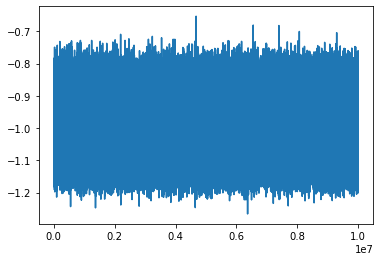

In [55]:
plt.plot(result.T[0])